# üîπ UFC Model Experiments

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

# Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 200) 

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root))
from src.metrics import *
from src.model_factory import model_factory
from src.model import UFCModel
from src.data import UFCData
from src.config import *
from src.io_model import load_data, load_all_models
from src.helpers import *

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

# Load Data

In [2]:
# Load UFCData
try:
    ufc_data = load_data(name='ufc_data')
    ufc_data_no_odds = load_data(name='ufc_data_no_odds')
    logger.info("‚úÖ UFCData objects loaded successfully.")
except Exception as e:
    logger.error(f"‚ùå Error loading training data: {e}")

INFO:src.io_model:üì¶ UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl
INFO:src.io_model:üì¶ UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data_no_odds.pkl
INFO:src.helpers:‚úÖ UFCData objects loaded successfully.


In [3]:
ufc_data

üìä UFC Dataset Summary
----------------------------------------
üß™ Total samples      : 6001
üß™ Train/Test split  : 4800 / 1201
üß™ Total features     : 20

üî¢ Numerical features : 17
üî† Categorical features: 3
    - Binary          : 2
    - Multiclass      : 1

üè∑ Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

‚úÖ No missing values detected

üìà Feature summary statistics (train set):
                        mean      std       min       max
LoseStreakDif          0.059    1.012    -6.000     6.000
WinStreakDif          -0.162    1.921   -18.000    10.000
TotalTitleBoutDif     -0.313    1.709   -16.000    15.000
KODif                 -0.536    2.181   -21.000    14.000
SubDif                -0.334    1.877   -15.000    10.000
HeightDif             -0.030    6.286   -33.020    30.480
ReachDif              -0.260    8.266   -33.020    30.480
AgeDif                 0.196    5.213   -17.000    17.000
SigStrDif             -2.540   19.869  -

In [4]:
ufc_data_no_odds

üìä UFC Dataset Summary
----------------------------------------
üß™ Total samples      : 6001
üß™ Train/Test split  : 4800 / 1201
üß™ Total features     : 19

üî¢ Numerical features : 16
üî† Categorical features: 3
    - Binary          : 2
    - Multiclass      : 1

üè∑ Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

‚úÖ No missing values detected

üìà Feature summary statistics (train set):
                      mean     std      min      max
LoseStreakDif        0.059   1.012   -6.000    6.000
WinStreakDif        -0.162   1.921  -18.000   10.000
TotalTitleBoutDif   -0.313   1.709  -16.000   15.000
KODif               -0.536   2.181  -21.000   14.000
SubDif              -0.334   1.877  -15.000   10.000
HeightDif           -0.030   6.286  -33.020   30.480
ReachDif            -0.260   8.266  -33.020   30.480
AgeDif               0.196   5.213  -17.000   17.000
SigStrDif           -2.540  19.869 -118.000  128.222
AvgSubAttDif        -0.076   0.8

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

# Load Models

In [5]:
model_list = load_all_models()

INFO:src.io_model:üì¶ Model 'Logistic Regression' loaded from: /home/mlioi/ufc-predictor/models/lr_best.pkl
INFO:src.io_model:‚úÖ Loaded model: Logistic Regression
INFO:src.io_model:üì¶ Model 'Random Forest' loaded from: /home/mlioi/ufc-predictor/models/rf_best.pkl
INFO:src.io_model:‚úÖ Loaded model: Random Forest
INFO:src.io_model:üì¶ Model 'Support Vector Machine' loaded from: /home/mlioi/ufc-predictor/models/svm_best.pkl
INFO:src.io_model:‚úÖ Loaded model: Support Vector Machine
INFO:src.io_model:üì¶ Model 'K-Nearest Neighbors' loaded from: /home/mlioi/ufc-predictor/models/knn_best.pkl
INFO:src.io_model:‚úÖ Loaded model: K-Nearest Neighbors
INFO:src.io_model:üì¶ Model 'AdaBoost' loaded from: /home/mlioi/ufc-predictor/models/ab_best.pkl
INFO:src.io_model:‚úÖ Loaded model: AdaBoost
INFO:src.io_model:üì¶ Model 'Naive Bayes' loaded from: /home/mlioi/ufc-predictor/models/nb_best.pkl
INFO:src.io_model:‚úÖ Loaded model: Naive Bayes
INFO:src.io_model:üì¶ Model 'Extra Trees' loaded fr

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

# Evaluate Models

In [4]:
for model in model_list:
    model.metrics = evaluate_metrics(model, ufc_data)
    model.cm = evaluate_cm(model, ufc_data)

# Check Models

## Metrics Comparison

In [5]:
model_metrics = compare_metrics(model_list)

INFO:src.metrics:Starting comparison of models...
INFO:src.metrics:Evaluating: Logistic Regression
INFO:src.metrics:Evaluating: Random Forest
INFO:src.metrics:Evaluating: Support Vector Machine
INFO:src.metrics:Evaluating: K-Nearest Neighbors
INFO:src.metrics:Evaluating: AdaBoost
INFO:src.metrics:Evaluating: Naive Bayes
INFO:src.metrics:Evaluating: Extra Trees
INFO:src.metrics:Evaluating: Gradient Boosting
INFO:src.metrics:Evaluating: Quadratic Discriminant Analysis
INFO:src.metrics:Evaluating: Neural Network
INFO:src.metrics:Evaluating: XGBoost


‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Comparison Completed  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


In [6]:
display(model_metrics)

Accuracy  Precision  Recall  F1 Score  \
Model                                                                    
Logistic Regression                0.6595     0.6112  0.5179    0.5607   
Random Forest                      0.6578     0.6214  0.4722    0.5366   
Support Vector Machine             0.6586     0.6068  0.5298    0.5657   
K-Nearest Neighbors                0.6037     0.5363  0.4107    0.4652   
AdaBoost                           0.6553     0.6264  0.4425    0.5186   
Naive Bayes                        0.6228     0.5464  0.5952    0.5698   
Extra Trees                        0.6478     0.6116  0.4405    0.5121   
Gradient Boosting                  0.6578     0.6396  0.4226    0.5090   
Quadratic Discriminant Analysis    0.6495     0.5950  0.5159    0.5526   
Neural Network                     0.6536     0.5965  0.5397    0.5667   
XGBoost                            0.6578     0.6148  0.4940    0.5479   

                                 ROC AUC  Brier Score  
Model                                                  
Logistic Regression               0.7132       0.2146  
Random Forest                     0.7057       0.2143  
Support Vector Machine            0.7115       0.2128  
K-Nearest Neighbors               0.6297       0.2383  
AdaBoost                          0.7102       0.2126  
Naive Bayes                       0.6597       0.2405  
Extra Trees                       0.6816       0.2212  
Gradient Boosting                 0.7117       0.2161  
Quadratic Discriminant Analysis   0.6885       0.2216  
Neural Network                    0.7054       0.2141  
XGBoost                           0.7097       0.2116

## Best Model per Metric

In [7]:
best_models_df = best_model_per_metric(model_metrics)
display(best_models_df)

INFO:src.metrics:Best model for Accuracy: Logistic Regression (0.6595)
INFO:src.metrics:Best model for Precision: Gradient Boosting (0.6396)
INFO:src.metrics:Best model for Recall: Naive Bayes (0.5952)
INFO:src.metrics:Best model for F1 Score: Naive Bayes (0.5698)
INFO:src.metrics:Best model for ROC AUC: Logistic Regression (0.7132)
INFO:src.metrics:Best model for Brier Score: Naive Bayes (0.2405)


Metric           Best Model   Value
0     Accuracy  Logistic Regression  0.6595
1    Precision    Gradient Boosting  0.6396
2       Recall          Naive Bayes  0.5952
3     F1 Score          Naive Bayes  0.5698
4      ROC AUC  Logistic Regression  0.7132
5  Brier Score          Naive Bayes  0.2405

## Feature Importance

‚úÖ Plot saved to: /home/mlioi/ufc-predictor/img/Noise-based-feature-selection-part5


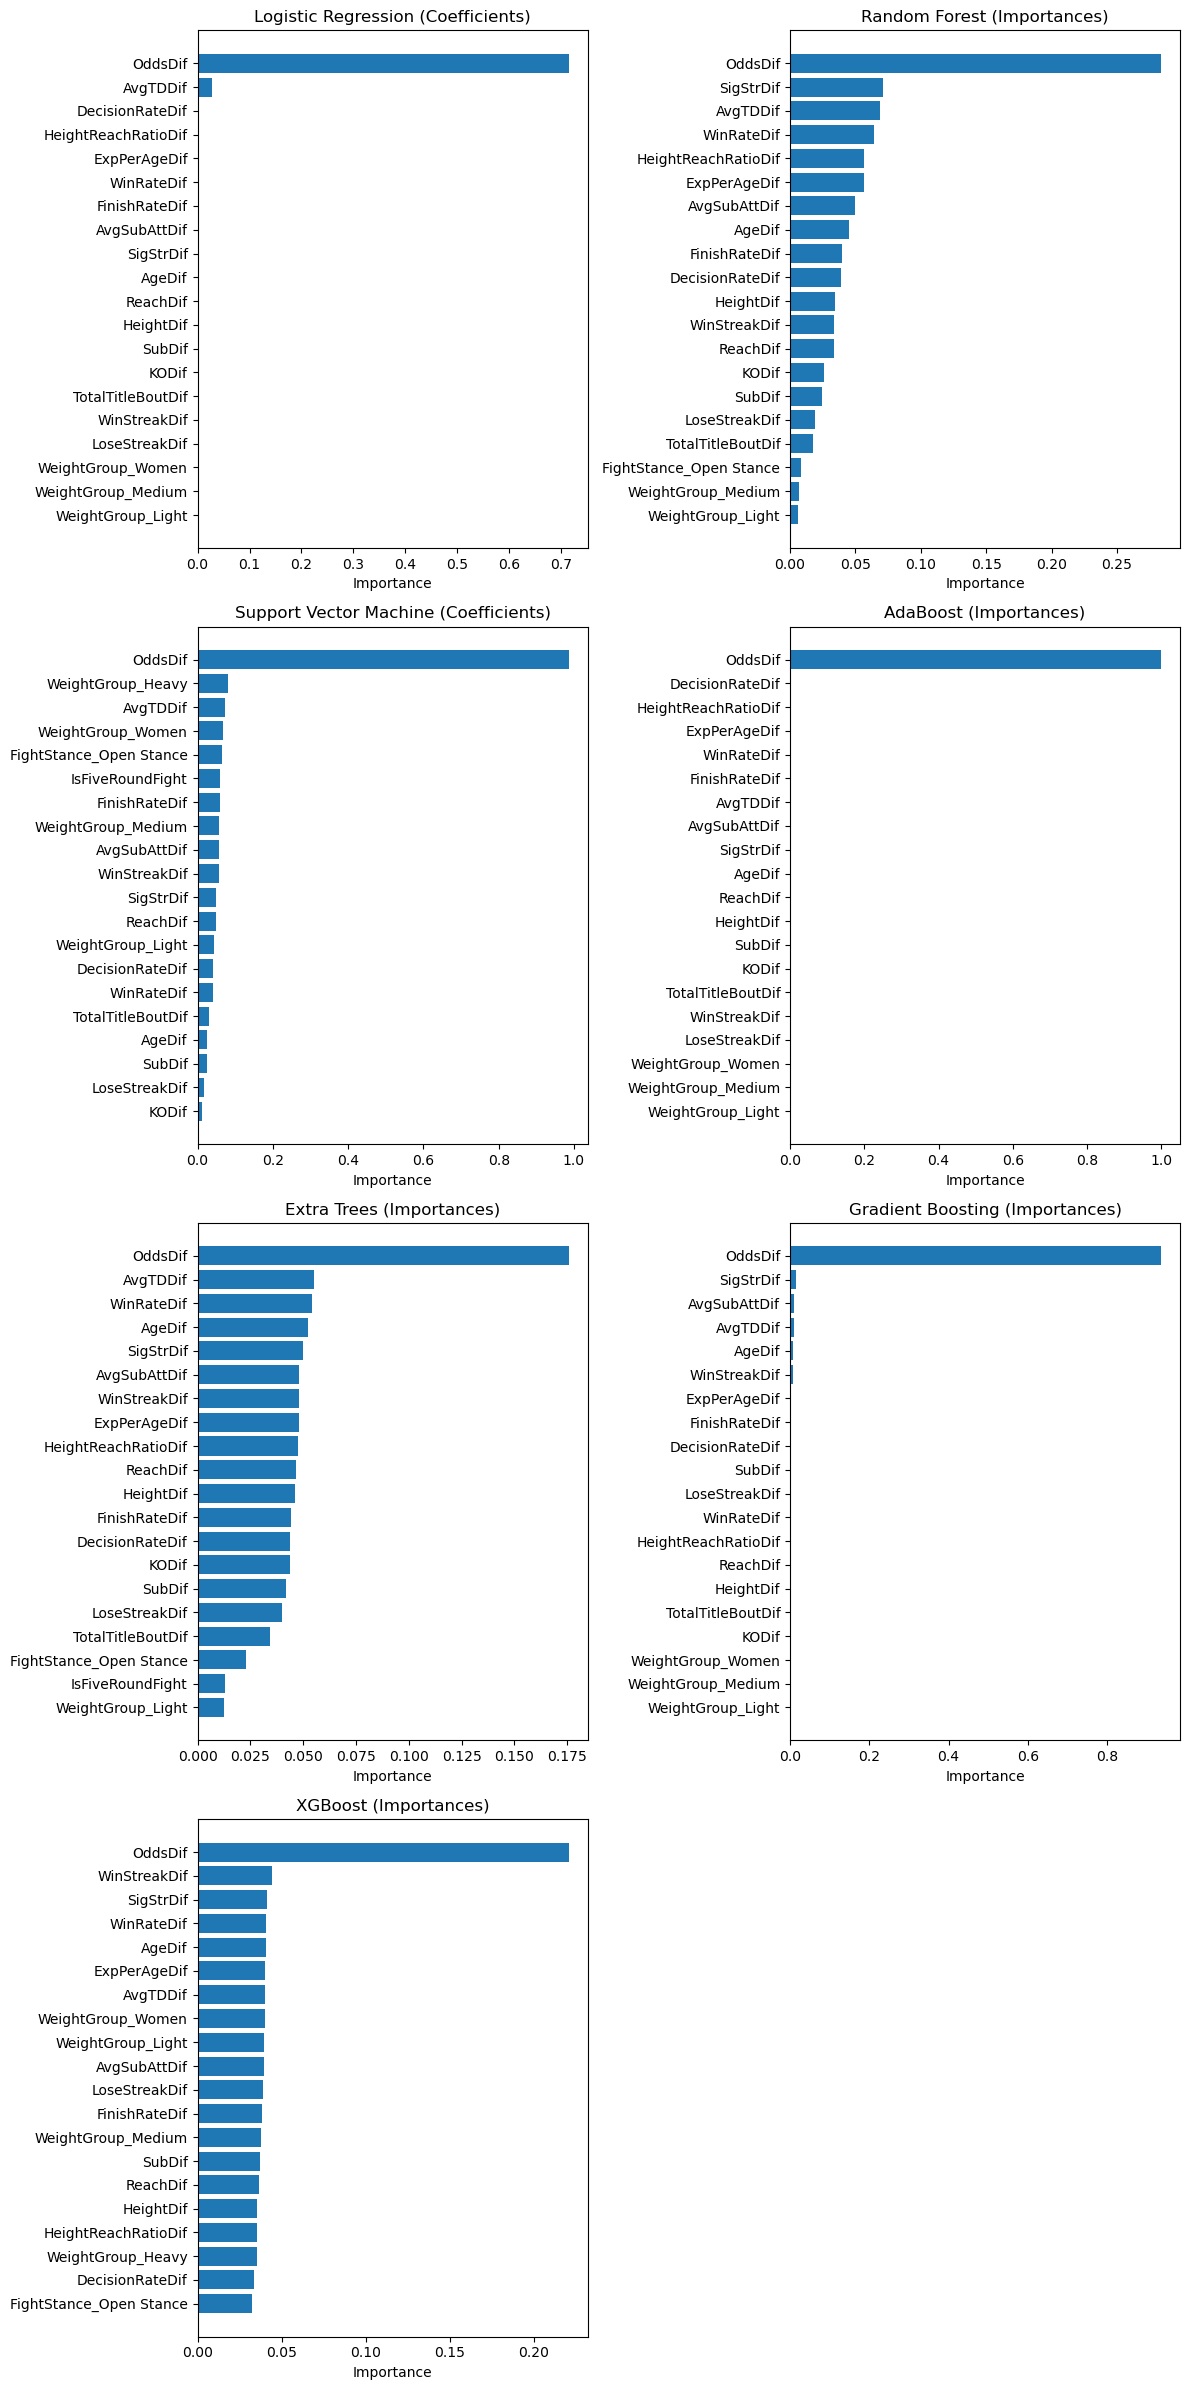

In [8]:
feature_names = ufc_data.get_processed_train()[0].columns.tolist()
UFCModel.plot_feature_importances_grid(model_list, save_file=True, feature_names= feature_names, filename= 'Noise-based-feature-selection-part5')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

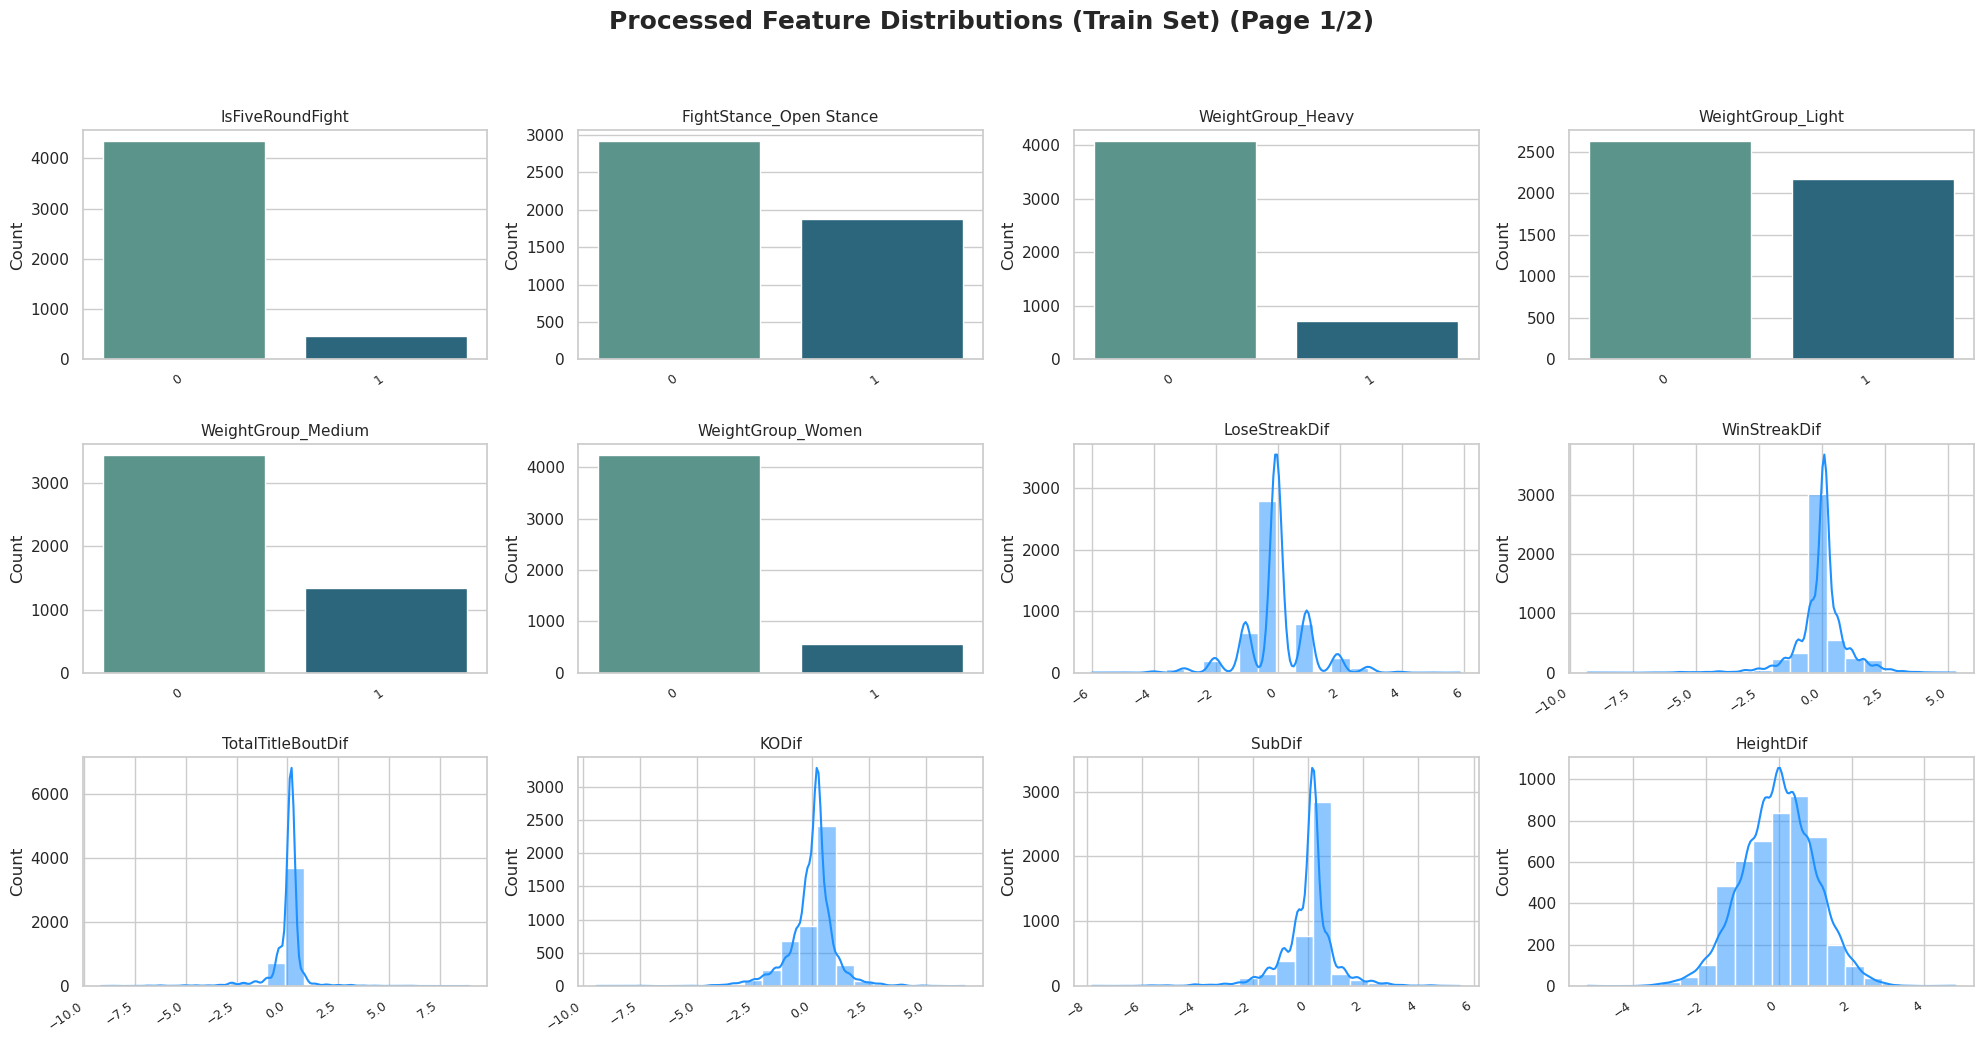

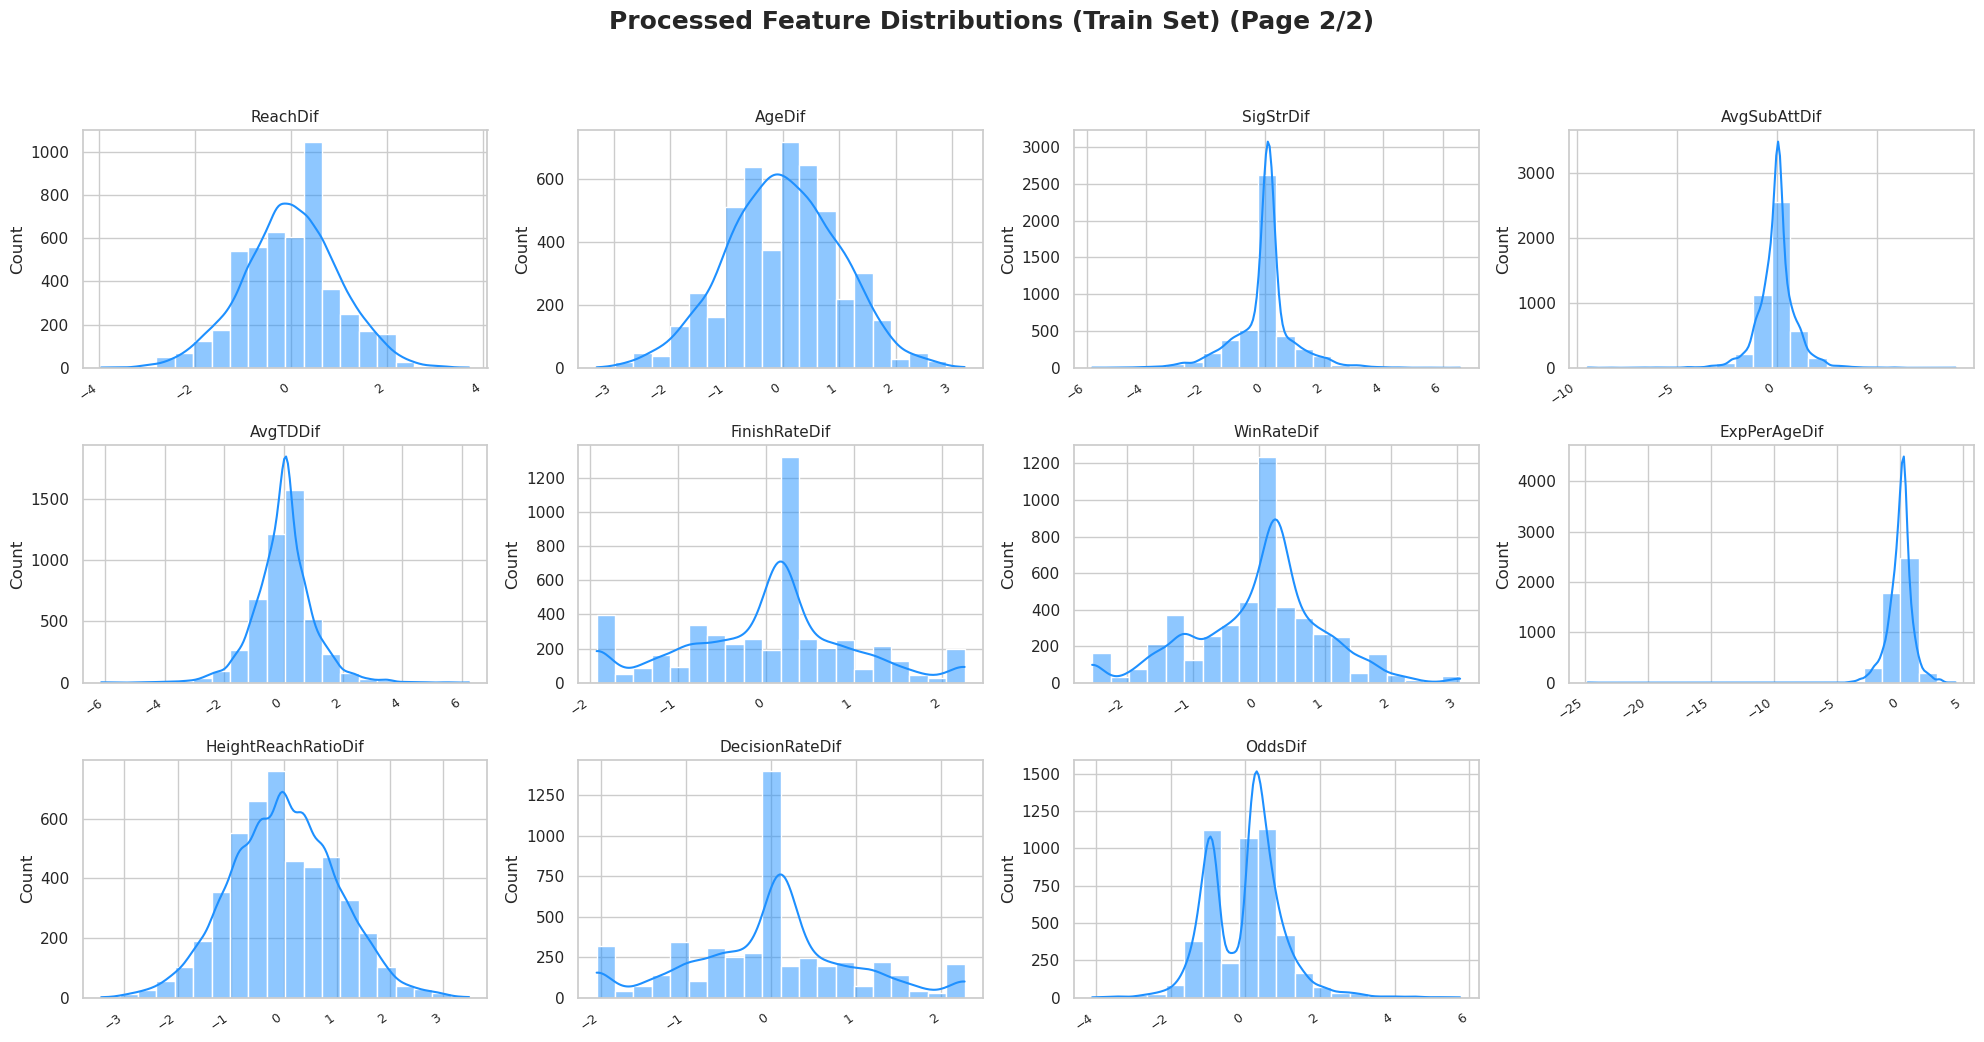

In [9]:
ufc_data.plot_feature_distributions(processed=True)